# Examen BAG 2023-2024. Vicente Revilla López

## Ejercicio 1: Recopilación de datos. (1p)

Se deben recopilar más de 5000 tweets en inglés que puedan tener un sentimiento positivo, 
negativo o neutro. Procurar mantener en la medida de lo posible una proporción equilibrada. Para la
recopilación de los datos se puede hacer de forma manual (no recomendable) o usar un dataset de 
tweets de la base de datos Kaggle (OJO! Que el texto no esté ya pre-procesado). Los tweets 
recopilados se deben almacenar en un archivo CSV que se debe leer con pandas. Muestra en el 
notebook las primeras 5 filas de la tabla leída.

In [1]:
#Se cargan todas las librerías que vamos a usar.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import re
from nltk.stem import SnowballStemmer
from textblob import TextBlob

In [2]:
# Para este ejercicio he usado un conjunto de datos descargado de la base de datos Kaggle, almacenado en un archivo CSV bajo
# el nombre de "Tweets.csv". Lo leemos con la función read_csv de pandas y nos quedamos únicamente con la columna "text", que
# contiene los mensajes de texto. Usando la función .head mostramos por pantalla las primeras 5 líneas del dataset.

tweets = pd.read_csv('Tweets.csv')
tweets=tweets["text"]
tweets.head(5)

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

## Ejercicio 2: Limpieza del texto, eliminar las palabras que no aportan información. (2p)

Crear una función limpiar_texto que toma un dataset como entrada y realiza una serie de 
pasos de preprocesamiento para limpiar y estructurar el texto de manera que sea más adecuado para 
tareas de procesamiento de lenguaje natural (NLP). 
Para cada línea de texto del data set, la función debe:
* Eliminar menciones, hashtags y URLs del texto. Pista: la función re.sub() puede ser útil.
* Convertir el texto en minúscula.
* Separa las palabras dentro del tweet como elementos de una lista. A este proceso se le llama tokenización, investiga cómo hacerlo con la función TweetTokenizer() incluida en NLTK.
* Para cada una de las palabras en esa lista generada:
    * Eliminar las palabras comunes y poco informativas (conocidas como stop words). Usa la recopilación de stop words que ya existe en NLTK (accede a ellas con stopwords.words() seleccionando inglés como idioma).
    * Utilizar técnicas de lematización (stemming). Investiga qué son y usa el modelo SnowballStemmer() que ya incluye NLTK para stemming.
* Transformar la lista final en una cadena de caracteres de nuevo. Cada palabra debe estar separada por un espacio y ese texto debe sustituir al original en la tabla del dataset.

In [3]:
def limpiar_texto(dataset):
    for n in range(0,len(dataset)):
        texto_limpio = re.sub(r"@\w+|#\w+|https?://\S+|www\.\S+|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+","",dataset[n])
        texto_minusculas = texto_limpio.lower()
        tokenizer = TweetTokenizer()
        texto_separado = tokenizer.tokenize(texto_minusculas)
        
        stop_words = set(stopwords.words('english'))
        texto_filtrado = []
        for palabra in texto_separado:
            if palabra not in stop_words:
                texto_filtrado.append(palabra)
            
            lematizacion = SnowballStemmer("english")
            lexemas = []
            for palabra in texto_filtrado:
                lexema = lematizacion.stem(palabra)
                lexemas.append(lexema)
        
        texto_final = " ".join(lexemas)
        dataset[n]=texto_final
    
    return dataset
                
# Para crear esta función recorremos un bucle para cada fila (n) del dataset dentro del cual aplicamos las siguientes funciones:
#   1. Con re.sub eliminamos hashtags (#), menciones (@) y URLs (https,www) del texto; especificando los argumentos requeridos
#      para eliminar cada cosa. También he eliminado los emoticonos mediante un código sacado de internet (U0001F600......).
#   2. Con la función .lower transformamos el texto resultante en todo minúsculas.
#   3. Con la función .tokenize de la herramienta TweetTokenizer() separamos cada palabra del texto como elementos de una lista
#   4. A continuación, creamos una lista vacía para ir guardando cada palabra relevante de los tweets en ella. Para discriminar
#      entre palabras relevantes e irrelevantes creamos una especie de diccionario (en inglés) de palabras no informativas con 
#      la función stopwords.words, y recorremos la totalidad del texto palabra por palabra filtrando sólo aquellas que 
#      NO aparezcan en la lista de palabras irrelevantes. Esto lo hacemos con un condicional y con la función .append().
#   5. Además, al mismo tiempo que filtramos las palabras, aquellas que pasen la criba las lematizamos utilizando la función
#      .stem de la herramienta SnowballStemmer(). Con lematizar nos referimos a eliminar prefijos y sufijos poco informativos
#      para quedarnos con la raíz (lexema) de la palabra.
#   6. Una vez hecho esto último, almacenamos el resultado final (el tweet procesado de la fila n) y lo sustituimos en el
#      dataset original.
# Como cada fila equivale a un tweet, esta función procesará cada tweet de manera independiente hasta hacerlo con todos los del
# dataset, para luego sobreescribir fila por fila el resultado sobre el dataset primitivo.

In [4]:
limpiar_texto(tweets)

0                                                   said .
1                      plus ad commerci experi ... tacki .
2               today ... must mean need take anoth trip !
3        realli aggress blast obnoxi " entertain " gues...
4                                     realli big bad thing
                               ...                        
14635                    thank got differ flight chicago .
14636    leav 20 minut late flight . warn communic 15 m...
14637                          pleas bring american airlin
14638    money , chang flight , answer phone ! suggest ...
14639    8 ppl need 2 know mani seat next flight . plz ...
Name: text, Length: 14640, dtype: object

## Ejercicio3: Etiquetado de datos con herramientas ya existentes. (2p)
El objetivo principal de esta función es asignar la categoría de sentimiento correspondiente usando modelos existentes como TextBlob. TextBlob asigna una puntuación de polaridad al texto, donde valores positivos indican sentimientos positivos y valores negativos indican sentimientos negativos. La intención del proyecto es usar los modelos ya existentes para crear el dataset de entrenamiento necesario para entrenar nuestro propio modelo e intentar que funcione mejor que los ya existentes. Define una función llamada clasificador que toma el dataset con el texto procesado y limpio como entrada. El resultado de este proceso debe almacenarse en un archivo CSV con dos columnas: una para la frase o texto y otra para la etiqueta correspondiente.
* Para cada línea de texto del data set, la función debe:
    * Utilizar el modelo TextBlob para realizar un análisis de sentimiento. Investiga cómo hacerlo.
    * En función de la polaridad calculada, clasificar el sentimiento en categorías específicas. Las categorías deben incluir "Contento", "Muy feliz", "Neutro", "Molesto" y "Hater".
* Finalmente, guardar los resultados como una columna nueva en el dataset.

In [5]:
def clasificador(data):
    categorias = []
    for fila in data:
        blob = TextBlob(fila)
        polaridad = blob.sentiment.polarity
        if polaridad == 0:
            categoria = "Neutro"
        elif polaridad > 0 and polaridad < 0.5:
            categoria = "Contento"
        elif polaridad >= 0.5:
            categoria = "Muy feliz"
        elif polaridad < 0 and polaridad > -0.5:
            categoria = "Molesto"
        elif polaridad <= -0.5:
            categoria = "Hater"
        
        categorias.append(categoria)
    
    data_frame = pd.DataFrame(data)
    data_frame["Categoria"] = categorias
    
    return data_frame
    
# Para crear esta función primero generamos una lista vacía de las categorías sentimentales. Recorremos un bucle para cada fila
# (tweet) del dataset.
#   1. Con el modelo de sentimiento TextBlob() calculamos la polaridad de cada tweet. La polaridad es un parámetro que puede
#      tomar cualquier valor entre -1 y 1; que nos va a indicar el sentimiento del texto. Típicamente, si la polaridad es
#      negativa, el texto emana negatividad; si es positiva, positividad; y si vale 0, neutralidad.
#   2. Sabiendo esto, mediante un condicional múltiple podemos clasificar cada tweet en función de su polaridad:
#        a. Si la polaridad vale exactamente 0, etiqueta el tweet como "Neutro".
#        b. Si la polaridad vale entre (0,0.5), etiqueta el tweet como "Contento".
#        c. Si la polaridad vale entre [0.5,1], etiqueta el tweet como "Muy feliz".
#        d. Si la polaridad vale entre (-0.5,0), etiqueta el tweet como "Molesto".
#        e. Si la polaridad vale entre [-1,-0.5], etiqueta el tweet como "Hater".
#      Una vez el tweet (n) ha sido etiquetado, se almacena su categoría en la lista vacía creada al principio mediante la 
#      función .append. Como la función hará esto para cada tweet (fila), la lista final contendrá la categoría de cada tweet
#      ordenada correctamente.
#   3. Finalmente, convertimos el dataset que contiene los tweets en un Data Frame (función pd.DataFrame) y le añadimos la
#      lista con las categorías, creando una nueva columna en el dataset llamada "Categoria". Esto es posible pues ambas
#      columnas tienen el mismo número de datos (cada tweet con su categoría).

In [6]:
tweets = clasificador(tweets)

In [7]:
tweets.head(5)

,text,Categoria
0,said .,Neutro
1,plus ad commerci experi ... tacki .,Neutro
2,today ... must mean need take anoth trip !,Molesto
3,"realli aggress blast obnoxi "" entertain "" gues...",Neutro
4,realli big bad thing,Molesto


## Ejercicio4: Codificación de los atributos y objetivos. (1p)
Investiga cómo funciona CountVectorizer () e investiga si existe otro codificador que se ajuste mejor a tu tarea. Una vez codificado, separa el conjunto de entrenamiento del conjunto de prueba.

In [8]:
# Codificación de atributos y objetivos:
# Convertimos los datos discretos (texto) a números enteros para poder trabajar con ellos mediante sklearn. Definimos los
# atributos como el texto de los tweets, y los objetivos como las categorías de los tweets. Para codificarlos utilizamos la
# función .fit_transform, pero para los atributos aplicamos la herramienta CountVectorizer() y para los objetivos aplicamos
# LabelEncoder(), pues ambos son los codificadores que mejor se ajustan para sus respectivos datos.

atributos = tweets["text"]
objetivo = tweets["Categoria"]

vectorizer = CountVectorizer()
atributos_codificados = vectorizer.fit_transform(atributos)

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
objetivo_codificado = label_encoder.fit_transform(objetivo)

In [9]:
# Separación conjunto de entrenamiento y de prueba:
# Una vez codificadas las variables, es necesario separar el conjunto de datos en dos: un conjunto de entrenamiento, que se 
# usará para construir los distintos modelos; y un conjunto de prueba, que se usará para comparar dichos modelos.
# Esto lo llevamos a cabo mediante la función train_test_split, especificando como argumentos nuestros datos codificados,
# un valor de semilla aleatoria adecuado para que el muestreo sea reproducible a pesar de ser aleatorio (random_state), el 
# tamaño del conjunto de prueba (test_size), y estratificamos respecto a la distribución de valores en la variable objetivo
# (stratify).

(atributos_entrenamiento, atributos_prueba, objetivo_entrenamiento, objetivo_prueba) = train_test_split(atributos_codificados, 
                                                                                                        objetivo_codificado, 
                                                                                                        random_state=12345, 
                                                                                                        test_size=0.2, 
                                                                                                        stratify=objetivo_codificado)

## Ejercicio5: Entrenamiento del modelo. (2p)
Entrena un modelo Naive Bayes y otro de tu elección. Investiga sobre qué versiones de cada modelo es más adecuada para la tarea a realizar. Calcula el porcentaje de acierto del modelo entrenado. Si el porcentaje de acierto está por debajo del 70%, vuelve atrás e intenta mejorar este resultado.

In [10]:
#Modelo Naive Bayes
naive_bayes = MultinomialNB(alpha=1.0)
naive_bayes.fit(atributos_entrenamiento, objetivo_entrenamiento)

#Realizar las predicciones con el conjunto de prueba
predicciones_nb = naive_bayes.predict(atributos_prueba)
#Calcular la precisión del modelo
precision_nb = naive_bayes.score(atributos_prueba, objetivo_prueba)
print("La precisión del modelo Naive Bayes desarrollado es:", precision_nb*100, "%")

La precisión del modelo Naive Bayes desarrollado es: 78.72267759562843 %


In [11]:
#Modelo de mi elección: modelo de regresión logística -> 'LogisticRegression'. Investigando sobre posibles modelos, el que
# mejor se ajusta a la tarea que estamos realizando es el modelo de regresión logística, pues es un modelo que ofrece buenos
# resultados para análisis tanto binarios como multinomiales. En este caso, al ser multinomial, hay que especificarlo con el
# argumento multi_class.

from sklearn.linear_model import LogisticRegression

regresion_logistica = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
regresion_logistica.fit(atributos_entrenamiento, objetivo_entrenamiento)

#Realiza las predicciones con el conjunto de prueba
predicciones_relog = regresion_logistica.predict(atributos_prueba)
#Calcular la precisión del modelo
precision_relog = regresion_logistica.score(atributos_prueba, objetivo_prueba)
print("La precisión del modelo de regresión logística desarrollado es:", precision_relog*100, "%")

La precisión del modelo de regresión logística desarrollado es: 89.03688524590164 %


## Ejercicio6: Usar el modelo entrenado (2p)
Se deben recopilar los últimos 30 tweets de dos personas con influencia en redes sociales de forma manual, alguna conocida por su mala fama como “hater” y otra con una valoración social más positiva. Utilizar el modelo desarrollado para predecir el sentimiento de cada tweet. Los resultados para cada persona deben ser ilustrados en un pie chart (diagrama de sectores) que muestre el estado de ánimo (el porcentaje de tweets clasificados con cada etiqueta).

#### 1. Persona de estilo más negativo
Para esta tarea, he navegado por X (Twitter) y he dado con una escritora-activista australiana llamada Alexandra Marshall (@ellymelly) cuyos tweets son la mayoría críticas contra algún tema concreto. He recopilado 30 de sus últimos tweets (obviando alguno que sólo contenía emoticonos) en un archivo CSV de nombre "Tweets_hater_examen", y he aplicado el modelo de detección de sentimientos generado sobre ellos. He aquí el resultado:

In [12]:
marshall = pd.read_csv('Tweets_hater_examen.csv', delimiter=";")
marshall = marshall["Texto"]
marshall

0     The Labor Party are copy-pasting a Morrison-er...
1     It's not a coincidence that the people who wan...
2     From the Daily Mail. Everything we watch is so...
3     50 years of energy saving devices marketed und...
4     The #Left can't get their grievance stories st...
5     20 years ago, companies were not allowed to as...
6     Social Justice politics is not meant to make s...
7     The Left want all the 'white colonisers' to 'g...
8     It is sensible to be 'phobic' about a dangerou...
9     People are getting 'bored' of #ClimateChange, ...
10    Local councils: Ban Australia Day. Politicians...
11    I'm not 'anti-vaxx'. I am anti 'being forced t...
12    Farmers can stage protests in Europe against t...
13    So many people wrongly believe that #renewable...
14    Victimhood is the preferred career path for th...
15    Our political leaders are motivated by holding...
16    What is this modern obsession with printing fo...
17    Citizen spending did not cause inflation. 

In [13]:
limpiar_texto(marshall)

0     labor parti copy-past morrison-era censorship ...
1     coincid peopl want live smart citi think freed...
2     daili mail . everyth watch fake . lisa re-engi...
3     50 year energi save devic market messag : use ...
4     can't get grievanc stori straight . colonis ev...
5     20 year ago , compani allow ask race , gender ...
6     social justic polit meant make sens . that who...
7     left want ' white colonis ' ' go back came ' w...
8                   sensibl ' phobic ' danger ideolog .
9     peopl get ' bore ' , say peter ridd live ' cli...
10    local council : ban australia day . politician...
11    i'm ' anti-vaxx ' . anti ' forc particip high-...
12    farmer stage protest europ abl converg citi ce...
13    mani peopl wrong believ energi mean ' big hole...
14          victimhood prefer career path achiev noth .
15    polit leader motiv hold power make money . pur...
16          modern obsess print food instead grow ? ? ?
17    citizen spend caus inflat . govern spend c

In [14]:
marshall = clasificador(marshall)
marshall

,Texto,Categoria
0,labor parti copy-past morrison-era censorship ...,Molesto
1,coincid peopl want live smart citi think freed...,Molesto
2,daili mail . everyth watch fake . lisa re-engi...,Hater
3,50 year energi save devic market messag : use ...,Molesto
4,can't get grievanc stori straight . colonis ev...,Hater
5,"20 year ago , compani allow ask race , gender ...",Molesto
6,social justic polit meant make sens . that who...,Contento
7,left want ' white colonis ' ' go back came ' w...,Neutro
8,sensibl ' phobic ' danger ideolog .,Neutro
9,"peopl get ' bore ' , say peter ridd live ' cli...",Contento


In [15]:
sentimientos_marshall = marshall["Categoria"].value_counts()
sentimientos_marshall

Categoria
Contento     10
Molesto       9
Neutro        8
Hater         2
Muy feliz     1
Name: count, dtype: int64

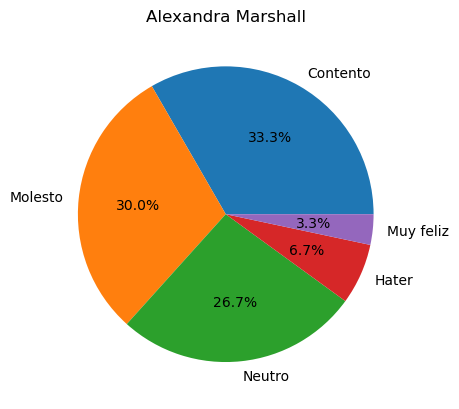

In [16]:
import matplotlib.pyplot as plt

plt.pie(sentimientos_marshall, labels=sentimientos_marshall.index, autopct="%1.1f%%")
plt.title("Alexandra Marshall")
plt.show()

#### 1. Persona de estilo más positivo
Para esta otra tarea, he utilizado los tweets de la famosa tenista Serena Williams (@serenawilliams), ganadora de 23 torneos de Grand Slam, y he aplicado nuevamente el modelo de detección de sentimientos sobre ellos. He aquí el resultado:

In [17]:
serena = pd.read_csv('Tweets_normal_examen.csv', delimiter=";")
serena = serena["Texto"]
serena

0     I often live too far in the future. Wondering ...
1     I’m working out to my tennis pre match playlis...
2     Thank you for holding the door open for me…. B...
3     Today is hair day! I’m braids. I get so excite...
4             Dall-e got tired of me asking for images.
5                   Butterfingers are so under rated. 🍫
6     Starting to collect match-worn jerseys. thanks...
7                                 Back to work we go ….
8                                This makes me so happy
9     I am not ok today. And that’s ok to not be ok....
10    Orange slices (you know the candy) are my kryp...
11    You ever get so tired your brain stops working...
12    Having 2 kids is def not easy. How do you moms...
13    Have you ever wanted to start your work out bu...
14    It’s unhealthy on how excited I am for the new...
15    I’m not used to working out with no goal or to...
16                                8 is a better number.
17     My new fragrance is “old spoiled milk”. #

In [18]:
limpiar_texto(serena)

0     often live far futur . wonder feel tomorrow 10...
1     ’ work tenni pre match playlist … aiiiii get p...
2     thank hold door open … . ’ footbal field away ...
3     today hair day ! ’ braid . get excit hair day ...
4                             dall- got tire ask imag .
5                                     butterfing rate .
6     start collect match-worn jersey . thank ’ say ...
7                                      back work go … .
8                                            make happi
9     ok today . ’ ok ok . one ok everi singl day . ...
10               orang slice ( know candi ) kryptonit .
11    ever get tire brain stop work ’ think basic th...
12    2 kid def easi . mom / dad well ! ! ! ? ? ? es...
13    ever want start work sudden rememb list … . do...
14    ’ unhealthi excit new * nsync music troll movi...
15    ’ use work goal honest - championship mind . s...
16                                    8 better number .
17                    new fragranc “ old spoil m

In [19]:
serena = clasificador(serena)
serena

,Texto,Categoria
0,often live far futur . wonder feel tomorrow 10...,Contento
1,’ work tenni pre match playlist … aiiiii get p...,Contento
2,thank hold door open … . ’ footbal field away ...,Neutro
3,today hair day ! ’ braid . get excit hair day ...,Muy feliz
4,dall- got tire ask imag .,Neutro
5,butterfing rate .,Neutro
6,start collect match-worn jersey . thank ’ say ...,Contento
7,back work go … .,Neutro
8,make happi,Neutro
9,ok today . ’ ok ok . one ok everi singl day . ...,Muy feliz


In [20]:
sentimientos_serena = serena["Categoria"].value_counts()
sentimientos_serena

Categoria
Contento     14
Neutro        9
Muy feliz     5
Hater         1
Molesto       1
Name: count, dtype: int64

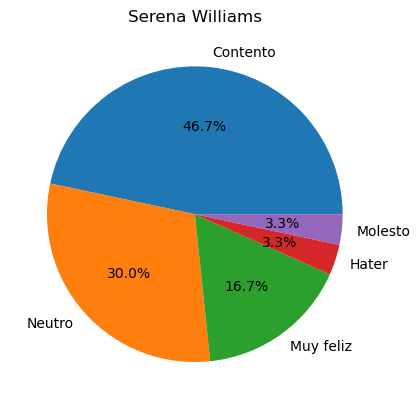

In [21]:
plt.pie(sentimientos_serena, labels=sentimientos_serena.index, autopct="%1.1f%%")
plt.title("Serena Williams")
plt.show()